In [11]:
import numpy as np
import tensorflow as tf

In [12]:
data_dir = 'Rice_Image_Dataset/Train'
batch_size = 64
img_height = 50
img_width = 50

In [13]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 50000 files belonging to 5 classes.
Using 40000 files for training.


In [14]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 50000 files belonging to 5 classes.
Using 10000 files for validation.


In [15]:
class_names = train_ds.class_names
class_names

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(
      'horizontal',
      input_shape=(img_height, img_width, 3)),
      tf.keras.layers.RandomRotation(0.1),
      tf.keras.layers.RandomZoom(0.1),
  ])

In [18]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  # data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [19]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [20]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10


2022-06-11 19:56:58.325606: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-11 19:56:58.330436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - ETA: 0s - loss: 0.1298 - accuracy: 0.9521

2022-06-11 19:57:14.509793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 19s 20ms/step - loss: 0.1298 - accuracy: 0.9521 - val_loss: 0.0724 - val_accuracy: 0.9749
Epoch 2/10
625/625 [==============================] - 12s 19ms/step - loss: 0.0672 - accuracy: 0.9767 - val_loss: 0.0616 - val_accuracy: 0.9792
Epoch 3/10
625/625 [==============================] - 12s 19ms/step - loss: 0.0548 - accuracy: 0.9811 - val_loss: 0.0578 - val_accuracy: 0.9791
Epoch 4/10
625/625 [==============================] - 12s 19ms/step - loss: 0.0435 - accuracy: 0.9857 - val_loss: 0.0465 - val_accuracy: 0.9838
Epoch 5/10
625/625 [==============================] - 11s 18ms/step - loss: 0.0342 - accuracy: 0.9881 - val_loss: 0.0359 - val_accuracy: 0.9888
Epoch 6/10
625/625 [==============================] - 11s 18ms/step - loss: 0.0271 - accuracy: 0.9902 - val_loss: 0.0451 - val_accuracy: 0.9841
Epoch 7/10
625/625 [==============================] - 11s 18ms/step - loss: 0.0214 - accuracy: 0.9927 - val_loss: 0.0334 - val_accuracy: 0.9892
Epo

In [25]:
model.save('model.h5')

1/1 [==============================] - 0s 130ms/step
[100.   0.   0.   0.   0.]
 ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
Prediction:  Arborio 99.9974012374878%


2022-06-11 20:06:25.624590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


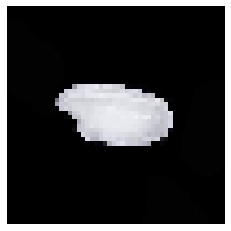

In [26]:
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('model.h5')

classes = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

path = 'Rice_Image_Dataset/Train/Arborio/Arborio (1).jpg'

img = tf.keras.preprocessing.image.load_img(path, target_size=(img_height, img_width)) 
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)

plt.imshow(img)
plt.axis('off')
print(f"{(predictions[0]*100).round(2)}\n", classes)
print("Prediction: ", classes[np.argmax(predictions)], f"{predictions[0][np.argmax(predictions)]*100}%")